In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', color_codes=True, font_scale=1)

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools

from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [2]:
Df_tn = pd.read_json('../input/train.json')
Df_tt = pd.read_json('../input/test.json')

In [8]:
print(Df_tn.shape)
print(Df_tt.shape)

(49352, 15)
(74659, 14)


In [7]:
Df_tn.info()
#Df_tn.columns
#Df_tn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [9]:
Df_tn.describe()    # only numerical columns

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [5]:
Df_tn[['price',
       'bedrooms', 'bathrooms',
       'latitude', 'longitude',
       'created',    # date
       'manager_id', 'building_id', 'listing_id',
       'display_address', 'street_address',    # NLP
       'features', 'description',    # NLP
       'photos',    # image
            
       'interest_level']].head().T

,10,10000,100004,100007,100013
price,3000,5465,2850,3275,3350
bedrooms,3,2,1,1,4
bathrooms,1.5,1,1,1,1
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
longitude,-73.9425,-73.9667,-74.0018,-73.9677,-73.9493
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
manager_id,5ba989232d0489da1b5f2c45f6688adc,7533621a882f71e25173b27e3139d83d,d9039c43983f6e564b1482b273bd7b01,1067e078446a7897d2da493d2f741316,98e13ad4b495b9613cef886d79a6291f
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
listing_id,7211212,7150865,6887163,6888711,6934781
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street


In [6]:
# add percentage over bars
def pct_bar():
    height = [p.get_height() for p in ax.patches]
    ncol = int(len(height)/3)
    total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
    for i, p in enumerate(ax.patches):
        ax.text(p.get_x() + p.get_width()/2,
                height[i] + 50,
                '{:1.0%}'.format(height[i]/total[i]),
                ha='center')

#### interest_level & "interest"

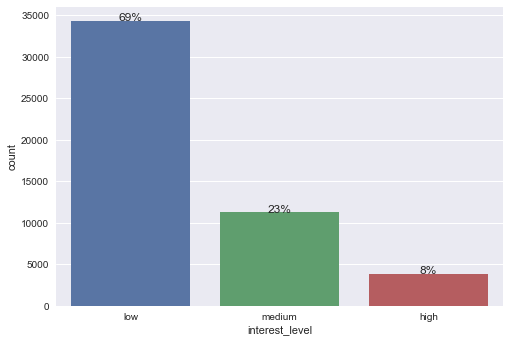

In [7]:
fig = plt.figure()
ax = sns.countplot(Df_tn.interest_level, order=['low', 'medium', 'high'])
plt.xlabel('interest_level')
pct_bar()

In [8]:
# numerical feature of interest_level
Df_tn['interest'] = np.where(Df_tn.interest_level=='low', 0.,
                                  np.where(Df_tn.interest_level=='medium', 1., 2.))

#### price

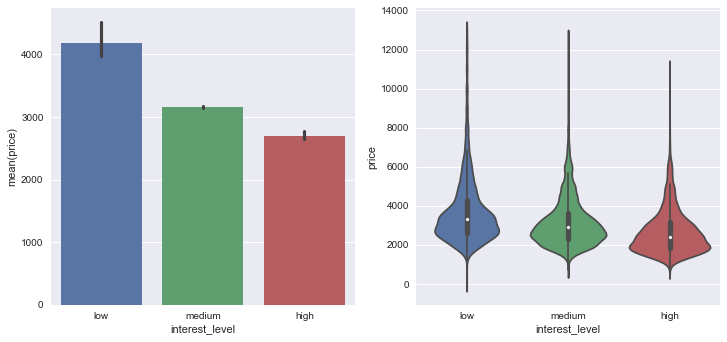

In [9]:
fig = plt.figure(figsize=(12,12))

# price distribution --> Error
#sns.distplot(Df_tn.price[Df_tn.price <= Df_tn.price.quantile(0.99)], ax=plt.subplot(211))

### Avg price vs interest_level
sns.barplot(data=Df_tn, x='interest_level', y='price', order=['low', 'medium', 'high'], ax=plt.subplot(223))

### violinplot of price vs interest_level
sns.violinplot(data=Df_tn[Df_tn.price <= Df_tn.price.quantile(0.99)],
               x='interest_level', y='price', order=['low', 'medium', 'high'], ax=plt.subplot(224))

#### bedrooms, bathrooms

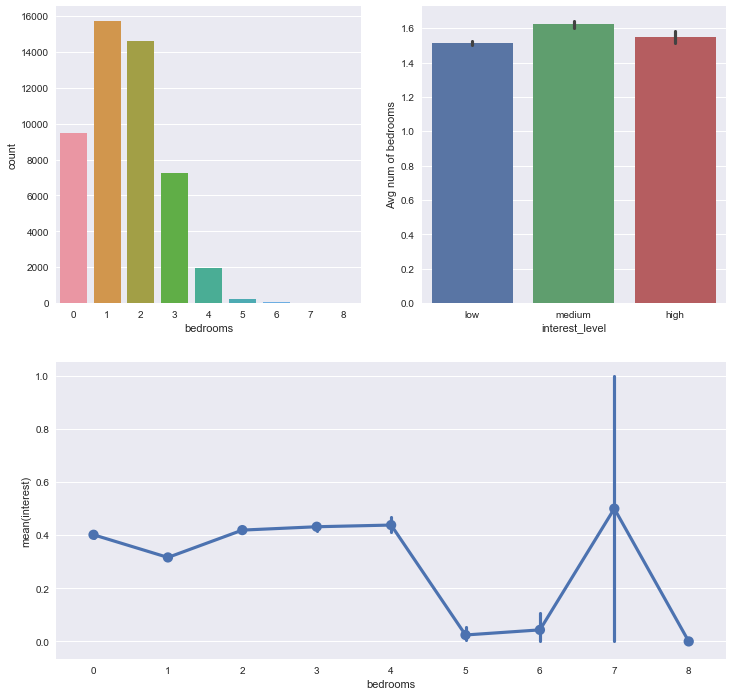

In [10]:
# bedroom graphs
fig = plt.figure(figsize=(12,12))

# counts
sns.countplot(Df_tn.bedrooms, ax=plt.subplot(221))

# average num of bedrooms vs interest_level
sns.barplot(data=Df_tn, x='interest_level', y='bedrooms', order=['low', 'medium', 'high'],
            ax=plt.subplot(222))
plt.ylabel('Avg num of bedrooms')

# Avg interest vs num of bedrooms
sns.pointplot(data=Df_tn, x='bedrooms', y='interest', ax=plt.subplot(212))

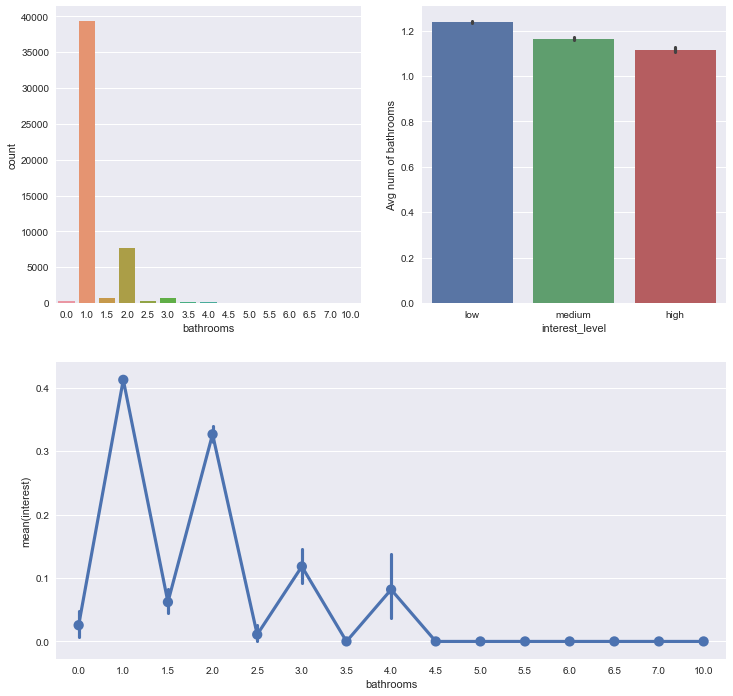

In [11]:
# bathroom graphs
fig = plt.figure(figsize=(12,12))

# counts
sns.countplot(Df_tn.bathrooms, ax=plt.subplot(221))

# average num of bathrooms vs interest_level
sns.barplot(data=Df_tn, x='interest_level', y='bathrooms', order=['low', 'medium', 'high'],
            ax=plt.subplot(222))
plt.ylabel('Avg num of bathrooms')

# Avg interest for every number of bathrooms
sns.pointplot(data=Df_tn, x='bathrooms', y='interest', ax=plt.subplot(212))

#### latitude, longitude

In [12]:
# most northern, southern, eastern, western
np.column_stack((Df_tn.latitude.nlargest(20),  Df_tn.latitude.nsmallest(20),
                 Df_tn.longitude.nlargest(20), Df_tn.longitude.nsmallest(20)))

array([[  44.8835,    0.    ,    0.    , -118.271 ],
       [  44.6038,    0.    ,    0.    ,  -93.2705],
       [  43.0346,    0.    ,    0.    ,  -87.6134],
       [  42.8725,    0.    ,    0.    ,  -86.1527],
       [  42.8724,    0.    ,    0.    ,  -76.6336],
       [  42.3459,    0.    ,    0.    ,  -75.5214],
       [  42.3459,    0.    ,    0.    ,  -75.1773],
       [  42.3459,    0.    ,    0.    ,  -74.6637],
       [  42.3459,    0.    ,    0.    ,  -74.6267],
       [  42.3033,    0.    ,    0.    ,  -74.6248],
       [  42.3033,    0.    ,    0.    ,  -74.5343],
       [  42.2509,    0.    ,    0.    ,  -74.4708],
       [  42.2019,   34.0126,  -70.9846,  -74.2432],
       [  42.2019,   39.7996,  -70.9846,  -74.2432],
       [  42.2019,   39.8395,  -70.9846,  -74.2432],
       [  42.2019,   40.045 ,  -70.9846,  -74.2224],
       [  41.753 ,   40.1159,  -71.006 ,  -74.2224],
       [  41.0868,   40.5065,  -71.0794,  -74.2224],
       [  41.0868,   40.5065,  -71.0794,  -74.

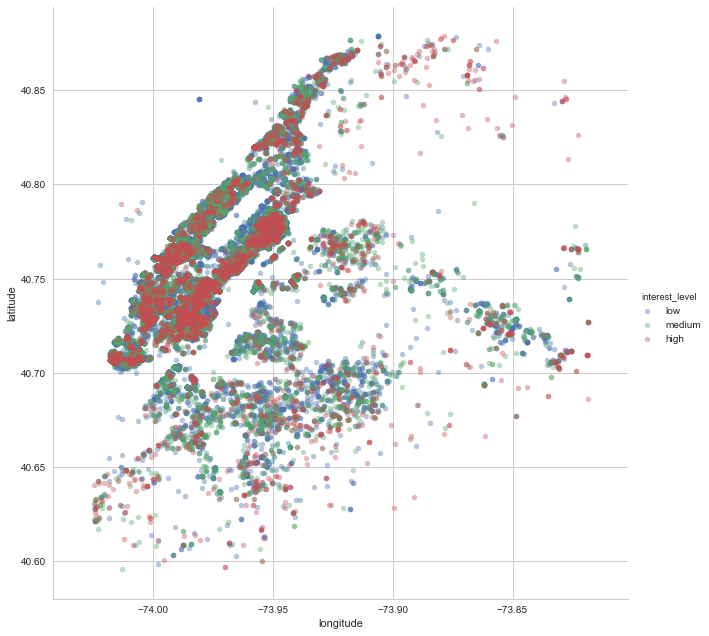

In [13]:
# interst_level map of NYC
sns.lmplot(data=Df_tn[(Df_tn.longitude > Df_tn.longitude.quantile(0.003)) &
                           (Df_tn.longitude < Df_tn.longitude.quantile(0.997)) &
                           (Df_tn.latitude  > Df_tn.latitude.quantile( 0.003)) &
                           (Df_tn.latitude  < Df_tn.latitude.quantile( 0.997))],
           x='longitude', y='latitude', fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4, 's':30})

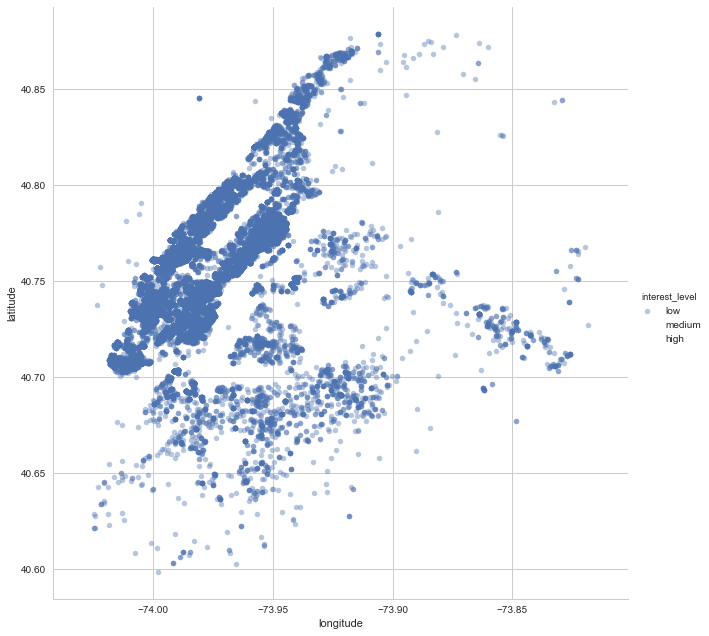

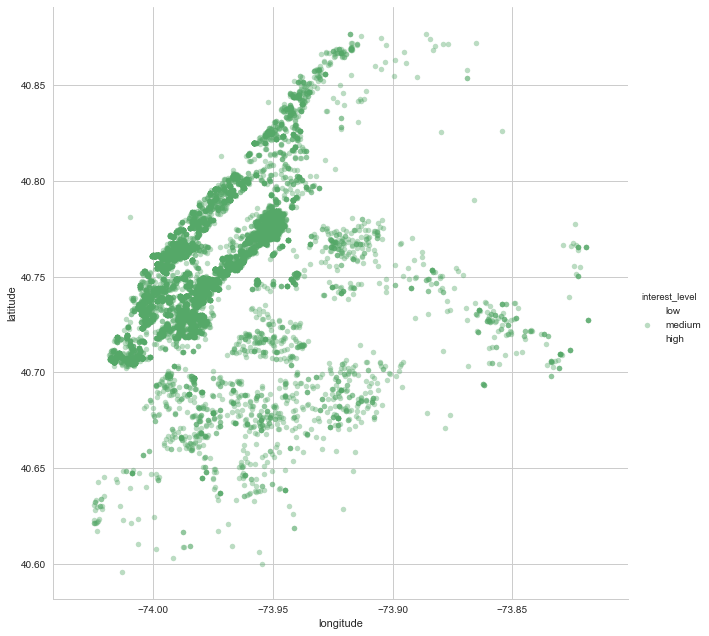

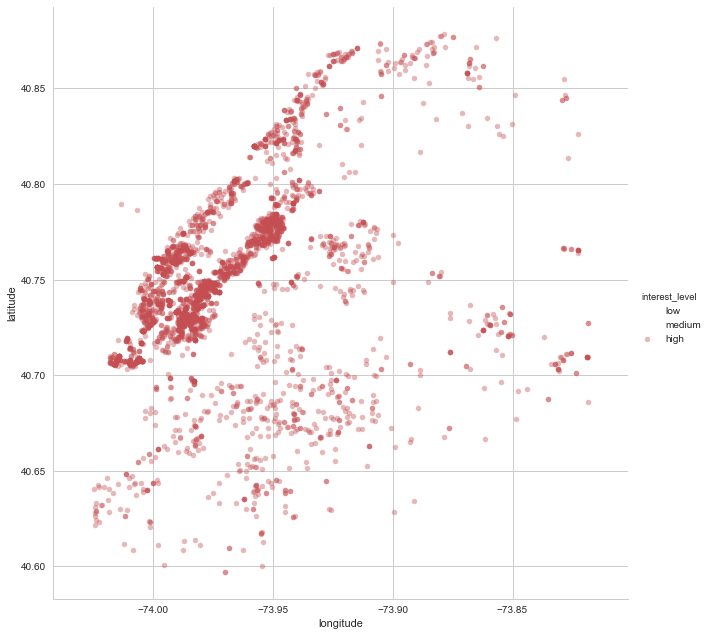

In [14]:
# low interst_level map of NYC
sns.lmplot(data=Df_tn[(Df_tn.longitude > Df_tn.longitude.quantile(0.003)) &
                           (Df_tn.longitude < Df_tn.longitude.quantile(0.997)) &
                           (Df_tn.latitude  > Df_tn.latitude.quantile( 0.003)) &
                           (Df_tn.latitude  < Df_tn.latitude.quantile( 0.997)) &
                          
                           (Df_tn.interest_level == 'low')],
           x='longitude', y='latitude', fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4, 's':30})

# medium interst_level map of NYC
sns.lmplot(data=Df_tn[(Df_tn.longitude > Df_tn.longitude.quantile(0.003)) &
                           (Df_tn.longitude < Df_tn.longitude.quantile(0.997)) &
                           (Df_tn.latitude  > Df_tn.latitude.quantile( 0.003)) &
                           (Df_tn.latitude  < Df_tn.latitude.quantile( 0.997)) &
                          
                           (Df_tn.interest_level == 'medium')],
           x='longitude', y='latitude', fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4, 's':30})

# high interst_level map of NYC
sns.lmplot(data=Df_tn[(Df_tn.longitude > Df_tn.longitude.quantile(0.003)) &
                           (Df_tn.longitude < Df_tn.longitude.quantile(0.997)) &
                           (Df_tn.latitude  > Df_tn.latitude.quantile( 0.003)) &
                           (Df_tn.latitude  < Df_tn.latitude.quantile( 0.997)) &
                          
                           (Df_tn.interest_level == 'high')],
           x='longitude', y='latitude', fit_reg=False, hue='interest_level',
           hue_order=['low', 'medium', 'high'], size=9, scatter_kws={'alpha':0.4, 's':30})

#### created + (month, day_of_week, hour)

In [15]:
# convert to Python date
Df_tn.created = pd.to_datetime(Df_tn.created, format='%Y-%m-%d %H:%M:%S')

# first date in DataFrame
print('First created at {}'.format(Df_tn.created.min()))
#print('First created at {}'.format(Df_tn.created.nsmallest(1).values[0]))

# last date in DataFrame
print('Last created at  {}'.format(Df_tn.created.max()))

First created at 2016-04-01 22:12:41
Last created at  2016-06-29 21:41:47


In [16]:
# new month, day of week and hour features
Df_tn['month']       = Df_tn.created.dt.month
Df_tn['day_of_week'] = Df_tn.created.dt.weekday_name
Df_tn['hour']        = Df_tn.created.dt.hour

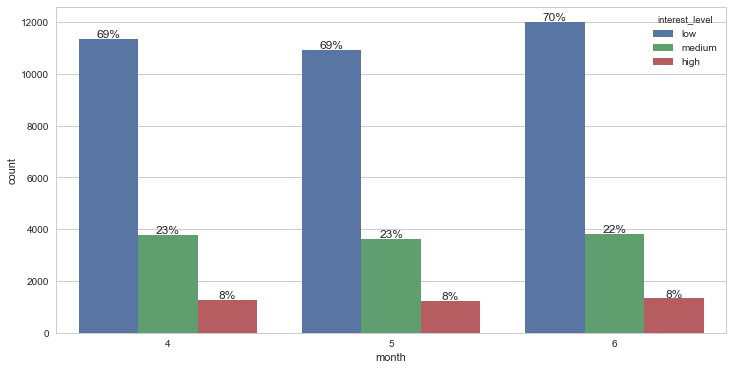

In [17]:
# interest_level vs month
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data=Df_tn, x='month', hue='interest_level', hue_order=['low', 'medium', 'high'])
pct_bar()

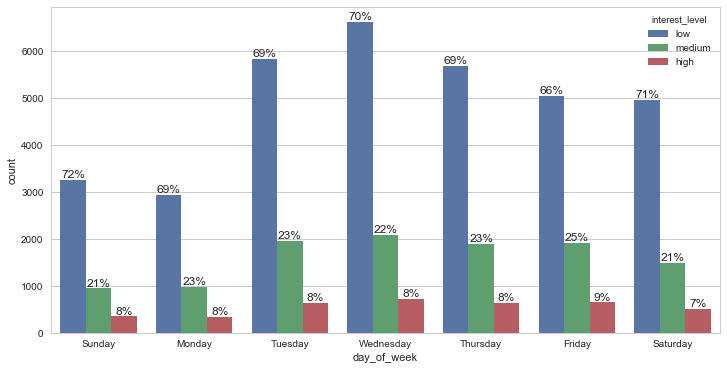

In [18]:
# interest_level vs day_of_week
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data=Df_tn, x='day_of_week', hue='interest_level', hue_order=['low', 'medium', 'high'],
                   order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
pct_bar()

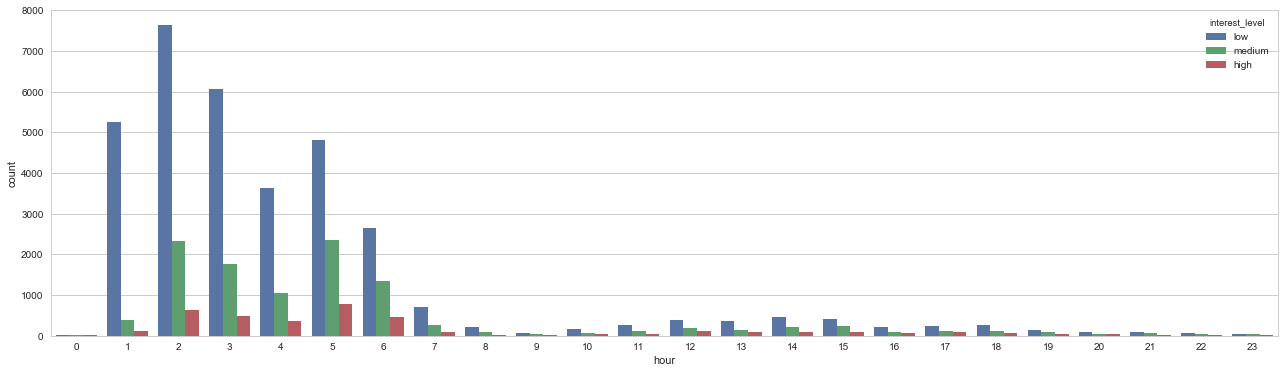

In [19]:
# interst_level vs hour
fig = plt.figure(figsize=(22,6))
sns.countplot(data=Df_tn, x='hour', hue='interest_level', hue_order=['low', 'medium', 'high'])

#### manager_id, building_id

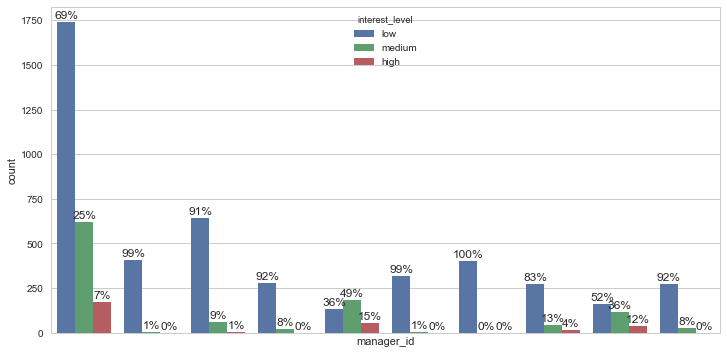

In [20]:
# top managers
top_managers = Df_tn.manager_id.value_counts().nlargest(10).index.tolist()
fig = plt.figure(figsize=(12,6))
ax = sns.countplot(data=Df_tn[Df_tn.manager_id.isin(top_managers)],
                   x='manager_id', hue='interest_level')

# manager_id is too long, so remove
plt.tick_params(labelbottom='off')

# add percentage over bars
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol = int(len(height)/3)
total = [height[i] + height[i + ncol] + height[i + 2*ncol] for i in range(ncol)] * 3
for i, p in enumerate(ax.patches):    
    ax.text(p.get_x()+p.get_width()/2,
            height[i] + 20,
            '{:1.0%}'.format(height[i]/total[i]),
            ha="center")

In [21]:
# most advertized buildings
Df_tn.building_id.value_counts().nlargest(10)

0                                   8286
96274288c84ddd7d5c5d8e425ee75027     275
11e1dec9d14b1a9e528386a2504b3afc     215
80a120d6bc3aba97f40fee8c2204524b     213
bb8658a3e432fb62a440615333376345     212
f68bf347f99df026f4faad43cc604048     191
c94301249b8c09429d329864d58e5b82     167
ce6d18bf3238e668b2bf23f4110b7b67     165
57ef86c28a8ae482dc3a3c3af28e8e48     159
128d4af0683efc5e1eded8dc8044d5e3     153
Name: building_id, dtype: int64

#### display_address, street_address

In [1]:
from wordcloud import WordCloud

In [22]:
# num of unique display_address
print('num of unique display_address: {}'.format(Df_tn.display_address.value_counts().shape[0]))

num of unique display_address: 8826


In [23]:
# most advertized display_address
Df_tn.display_address.value_counts().nlargest(15)

Broadway             438
East 34th Street     355
Second Avenue        349
Wall Street          332
West 37th Street     287
West Street          258
First Avenue         244
Gold Street          241
Washington Street    237
York Avenue          228
John Street          214
Water Street         214
East 39th Street     200
East 89th Street     195
West 54th Street     193
Name: display_address, dtype: int64

#### photos + "n_photos"

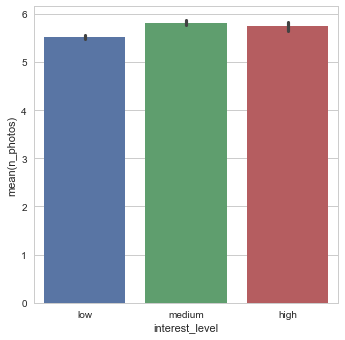

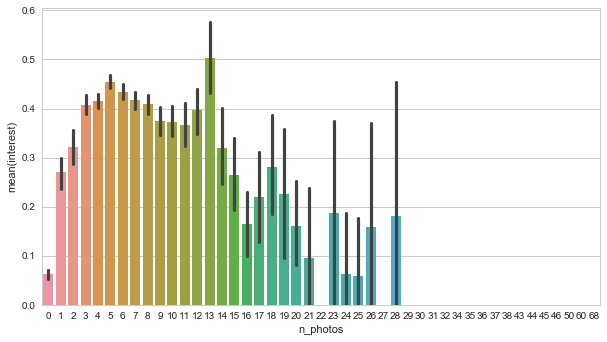

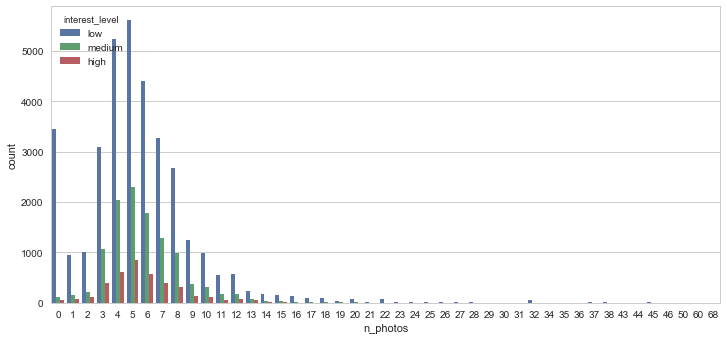

In [24]:
# num of photos
Df_tn['n_photos'] = Df_tn.photos.str.len()

# avg n_photos vs interest_level
fig = plt.figure(figsize=(12,12))
sns.barplot(data=Df_tn, x='interest_level', y='n_photos', order=['low', 'medium', 'high'], ax=plt.subplot(221))

# avg interest vs n_photos
fig = plt.figure(figsize=(22,12))
sns.barplot(data=Df_tn, x='n_photos', y='interest', ax=plt.subplot(222))

# interest_level vs n_photos
fig = plt.figure(figsize=(12,12))
sns.countplot(data=Df_tn, x='n_photos', hue='interest_level', hue_order=['low', 'medium', 'high'], ax=plt.subplot(212))

In [44]:
ftrs_to_use = ['price',
              'bedrooms', 'bathrooms',
              'latitude', 'longitude',
              'created',
              'manager_id', 'building_id',
              'n_photos']